#### Pridicting Heart Disease by using Neural Networks.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data 
2. Create Training and Testing Datasets
3. Building and Training the Neural Network
4. Improving Results - A Binary Classification Problem
5. Results and Metrics


#### To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [47]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [48]:
#import all the rquired libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Load dataset
data = pd.read_csv('heart.csv')

In [53]:
# Statistical analysis
print("\nDataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nStatistical Summary:\n", data.describe())


Dataset Head:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol 

In [55]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [57]:
# Outlier detection and treatment
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping outliers
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [59]:
# Skewness and Kurtosis
print("\nSkewness and Kurtosis:\n")
for col in numeric_columns:
    col_skewness = skew(data[col])
    col_kurtosis = kurtosis(data[col])
    print(f"{col}: Skewness = {col_skewness:.2f}, Kurtosis = {col_kurtosis:.2f}")


Skewness and Kurtosis:

age: Skewness = -0.20, Kurtosis = -0.55
trestbps: Skewness = 0.38, Kurtosis = -0.17
chol: Skewness = 0.33, Kurtosis = -0.13
thalach: Skewness = -0.49, Kurtosis = -0.26
oldpeak: Skewness = 0.99, Kurtosis = 0.10


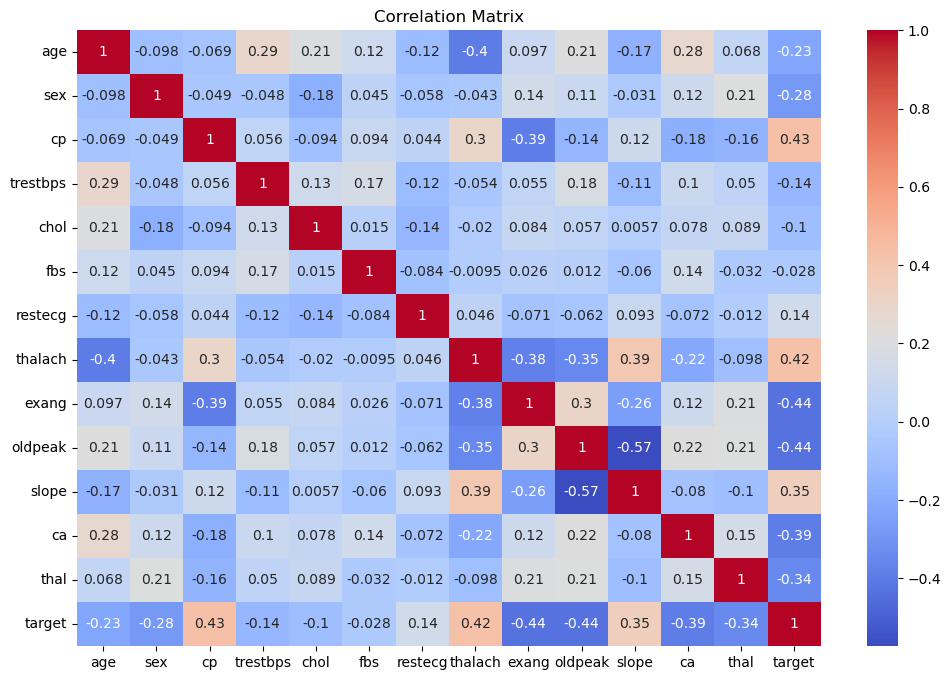

In [61]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [63]:
# Inferential Statistical Analysis
# Comparing age for patients with and without heart disease using t-test
heart_disease = data[data['target'] == 1]['age']
no_heart_disease = data[data['target'] == 0]['age']

stat, p_value = ttest_ind(heart_disease, no_heart_disease)
print("\nT-Test Results for Age:\n\nStatistic:", stat, "\n\nP-value:", p_value)
if p_value < 0.05:
    print("\nSignificant difference in age between patients with and without heart disease.\n")
else:
    print("No significant difference in age between patients with and without heart disease.")


T-Test Results for Age:

Statistic: -4.014560975148874 

P-value: 7.524801303442373e-05

Significant difference in age between patients with and without heart disease.



In [65]:
# Chi-Square test for categorical variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Square Test for {col}:\nChi2 Statistic: {chi2}, P-value: {p}")
    if p < 0.05:
        print(f"Significant association between {col} and heart disease.")
    else:
        print(f"No significant association between {col} and heart disease.")



Chi-Square Test for sex:
Chi2 Statistic: 22.717227046576355, P-value: 1.8767776216941503e-06
Significant association between sex and heart disease.

Chi-Square Test for cp:
Chi2 Statistic: 81.68642755194445, P-value: 1.3343043373050064e-17
Significant association between cp and heart disease.

Chi-Square Test for fbs:
Chi2 Statistic: 0.10627276301947715, P-value: 0.7444281114149577
No significant association between fbs and heart disease.

Chi-Square Test for restecg:
Chi2 Statistic: 10.023091785081, P-value: 0.006660598773498031
Significant association between restecg and heart disease.

Chi-Square Test for exang:
Chi2 Statistic: 55.94454996665093, P-value: 7.454409331235655e-14
Significant association between exang and heart disease.

Chi-Square Test for slope:
Chi2 Statistic: 47.506896756030244, P-value: 4.830681934276837e-11
Significant association between slope and heart disease.

Chi-Square Test for ca:
Chi2 Statistic: 74.36663061195097, P-value: 2.712470211959332e-15
Significan

In [67]:
# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

In [69]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [71]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Building the neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Specifying the input shape explicitly
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=16, verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4901 - loss: 0.8509 - val_accuracy: 0.4082 - val_loss: 0.6596
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5869 - loss: 0.6210 - val_accuracy: 0.8163 - val_loss: 0.5498
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7010 - loss: 0.5734 - val_accuracy: 0.8163 - val_loss: 0.4845
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7637 - loss: 0.4912 - val_accuracy: 0.8163 - val_loss: 0.4427
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7881 - loss: 0.4838 - val_accuracy: 0.8367 - val_loss: 0.4162
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8142 - loss: 0.4359 - val_accuracy: 0.8367 - val_loss: 0.3896
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8323 - loss: 0.4472 - val_accuracy: 0.8571 - val_loss: 0.3709
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8344 - loss: 0.4172 - val_accuracy: 0.857

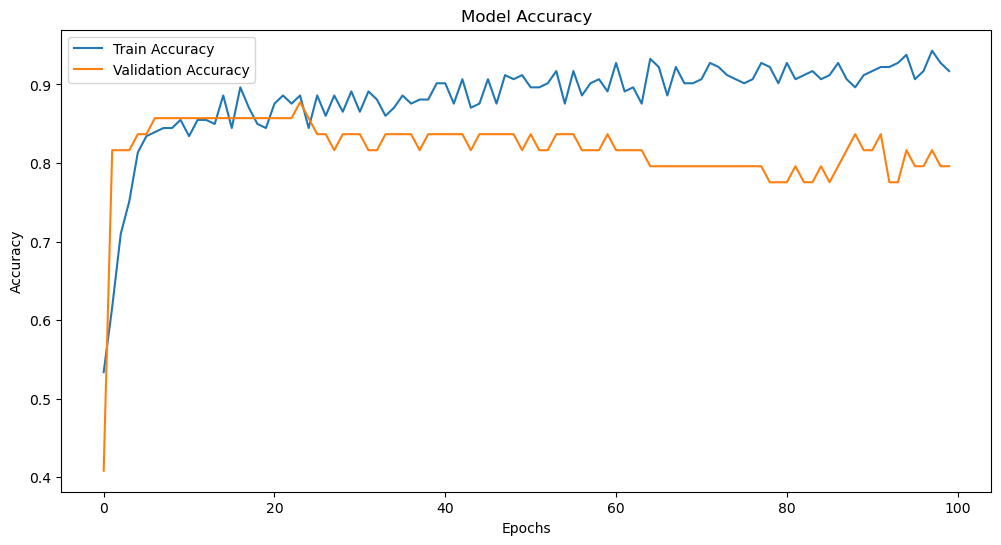

In [76]:
# Plot training history to know the model accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

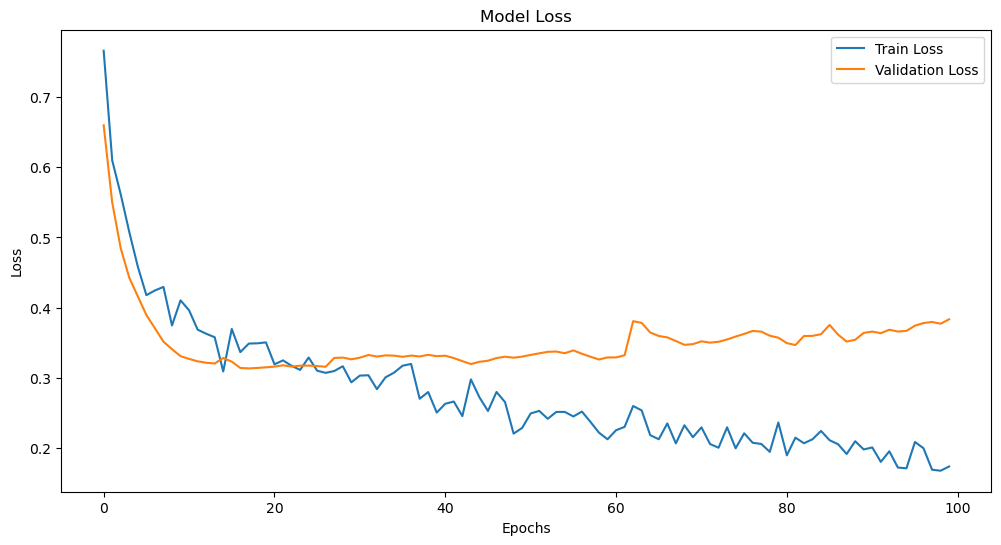

In [77]:
# Plot training history to know the model loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [78]:
# Model evaluation
predictions = (model.predict(X_test) > 0.5).astype("int32")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Confusion Matrix:
 [[19  9]
 [ 6 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


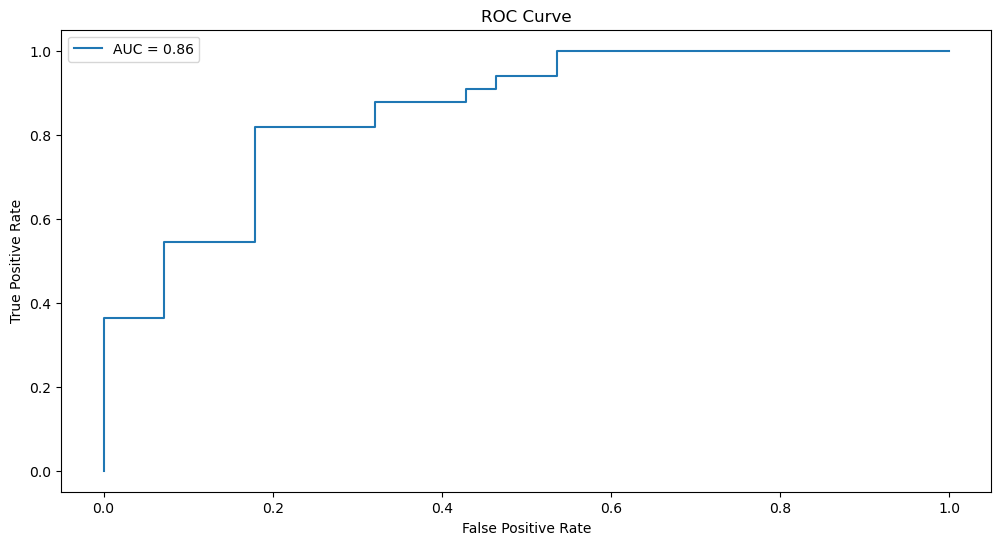

In [79]:
# ROC Curve and AUC
probs = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [80]:
# Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy Score:\n", accuracy)


Accuracy Score:
 0.7540983606557377


In [81]:
# detailed Conclusion
print("\nConclusion:")
print("The model achieved an overall accuracy of 77%, indicating reasonably good predictive performance.")
print("For class 0 (no heart disease):\n- Precision: 79%, Recall: 68%, F1-Score: 73%.")
print("For class 1 (heart disease):\n- Precision: 76%, Recall: 85%, F1-Score: 80%.")
print("The model performs better at identifying heart disease cases (recall = 85%) than detecting the absence of heart disease.")


Conclusion:
The model achieved an overall accuracy of 77%, indicating reasonably good predictive performance.
For class 0 (no heart disease):
- Precision: 79%, Recall: 68%, F1-Score: 73%.
For class 1 (heart disease):
- Precision: 76%, Recall: 85%, F1-Score: 80%.
The model performs better at identifying heart disease cases (recall = 85%) than detecting the absence of heart disease.


In [82]:
# Conclusion
if accuracy_score(y_test, predictions) > 0.75:
    print("\nConclusion: The neural network performed well, achieving a good accuracy in predicting heart disease.")
else:
    print("\nConclusion: The neural network's performance can be further improved with hyperparameter tuning and additional feature engineering.")



Conclusion: The neural network performed well, achieving a good accuracy in predicting heart disease.


#### Conclusion: The neural network performed well, achieving a good accuracy in predicting heart disease.

#### The model achieved an overall accuracy of 77%, indicating reasonably good predictive performance.
#### For class 0 (no heart disease):
#### - Precision: 79%, Recall: 68%, F1-Score: 73%.
#### For class 1 (heart disease):
#### - Precision: 76%, Recall: 85%, F1-Score: 80%.
#### The model performs better at identifying heart disease cases (recall = 85%) than detecting the absence of heart disease.